A GA (genetic algorithm) is a way to optimize something. 

Inheritance, variation, selection (for evolution). 

Needs a population (size) 

and the selection parameter is the which piece is more fit than the other. Measure of fitness. Translated genotype into a performance. Use performance to determine fitness. 

Variation (mutation) and comes with a mutation probability and some sort of change. 

Each organism is a single number between zero and infinity. If you have an organism that is 1.7 and one that is 3.4. Then the 3.4 one is twice as good (performance wise) than the 1.7 organism. 

Pick two organisms. The better one goes to the next generation. Keep doing this until the population is full. 



In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
def applyMutation(organism,mu): #with mutation rate applied
    if (random.uniform(0.0,1.0)<mu): 
        return organism+random.uniform(-0.1,0.1)
    return organism

for i in list(range(10)):
    print (applyMutation(0.5,0.2))


0.5
0.45578973976673043
0.5
0.5417538899804463
0.5
0.5
0.5
0.48142566055353436
0.5
0.5


# Tournament Selection

In [16]:
import random
from pandas import *
#create a population 
population=list()
#populate list called population with 100 random numbers 
popSize=100 
generations=100
mutationRate=0.1 #the mutation rate

meanW=list() #mean fitness
maxW=list() #max fitness
#counts from zero to pop size
for n in list(range(popSize)):
    #each organism is a random number 0.0 to 1.0
    #fitness assigned
    population.append(random.uniform(0.0,1.0))
#going through a defined number of generations    
for generation in list(range(generations)):
    #creating a generation to fill
    nextGeneration=list()
    #pick two organisms (by the indices) 
    meanW.append(mean(population))
    maxW.append(max(population))
    #selecting random organisms to compete against each other until generation is the same size as original population
    while len(nextGeneration)<popSize:
        org1=random.randint(0,popSize-1)
        org2=random.randint(0,popSize-1)
        # can write it to make sure org2 is not hte same as org2 with a while loop 
        if population[org1]>population[org2]:
            #org1 goes to the next gen
            nextGeneration.append(applyMutation(population[org1],mutationRate)) #mutation rate applied
        else:
            nextGeneration.append(applyMutation(population[org2],mutationRate))
    population=list(nextGeneration)
    

[2.9480675179112863, 2.797143080388517, 2.830717214678965, 2.877477317452372, 2.8666971174523583, 2.877477317452372, 2.7909458470879, 2.877477317452372, 2.830717214678965, 2.877477317452372, 2.8592827041705364, 2.8612882217266313, 2.999104343696071, 2.7909458470879, 2.802492078210035, 2.877477317452372, 2.7673548305770987, 2.7791411131385497, 2.9480675179112863, 2.7818128530401394, 2.877477317452372, 2.830717214678965, 2.7818128530401394, 2.7909458470879, 2.877477317452372, 2.830717214678965, 2.999104343696071, 2.830717214678965, 2.797143080388517, 2.830717214678965, 2.877477317452372, 2.7909458470879, 2.797143080388517, 2.877477317452372, 2.7909458470879, 2.959085116768786, 2.797143080388517, 2.830717214678965, 2.9480675179112863, 2.902607040392675, 2.848970423888658, 2.830717214678965, 2.7909458470879, 2.8748570038108503, 2.848970423888658, 2.877477317452372, 2.9480675179112863, 2.9480675179112863, 2.877477317452372, 2.8113767836255, 2.8612882217266313, 2.7818128530401394, 2.87747731

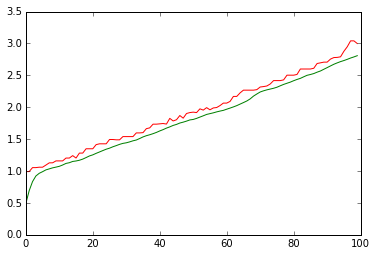

In [17]:
plot(meanW,'g') #mean fitness of the population 
plot(maxW,'r') #max fitness of the population
print (population)

In [3]:
print (population)

[0.7232006303848242, 0.21525886923209991, 0.8275347722341968, 0.6531133476986684, 0.3520913021887846, 0.1704083699835155, 0.8782700313978437, 0.7908629298318198, 0.2703479912427196, 0.25406288931530363, 0.955135698430937, 0.21718618227939002, 0.44899245297845614, 0.1419098945859536, 0.8391227987590963, 0.5343900084389096, 0.7482722084817083, 0.35734613571492024, 0.42348696865531676, 0.6133564832183099, 0.5233347721305848, 0.9218242285147334, 0.21037966767982652, 0.28400171924178885, 0.6505704498524644, 0.6966357471596505, 0.7577944670686648, 0.9313267183868855, 0.9998950582634333, 0.41443971989857853, 0.08827237116452646, 0.45839306852817463, 0.11173326596672972, 0.006618348700496046, 0.16663829293428878, 0.19826894309141052, 0.9582507195675073, 0.0858197675536666, 0.11605016053834016, 0.2897338377219216, 0.299397624652347, 0.34657124131814676, 0.5495837907611384, 0.7118102531591272, 0.26523632124505747, 0.48523076902166573, 0.229035744156317, 0.8445450540897338, 0.30493818476901813, 0

# Elite Selection

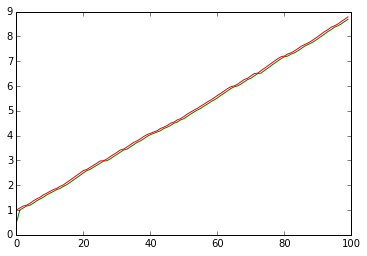

In [18]:
import random
from pandas import *
#create a population 
population=list()
#populate list called population with 100 random numbers 
popSize=100 
generations=100
mutationRate=0.1 #the mutation rate

meanW=list() #mean fitness
maxW=list() #max fitness
#counts from zero to pop size
for n in list(range(popSize)):
    #each organism is a random number 0.0 to 1.0
    #fitness assigned
    population.append(random.uniform(0.0,1.0))
#going through a defined number of generations    
for generation in list(range(generations)):
    #creating a generation to fill
    nextGeneration=list()
    #pick two organisms (by the indices) 
    meanW.append(mean(population))
    maxW.append(max(population))
   
    #sorts the population from smallest to largest.
    population.sort()
    #last guy is the best
    bestOrganism=population[popSize-1]
    #selecting random organisms to compete against each other until generation is the same size as original population
    while len(nextGeneration)<popSize:
        nextGeneration.append(applyMutation(bestOrganism,mutationRate))
    population=list(nextGeneration)

plot(meanW,'g')
plot(maxW,'r')
    

# Fitness proportional selection


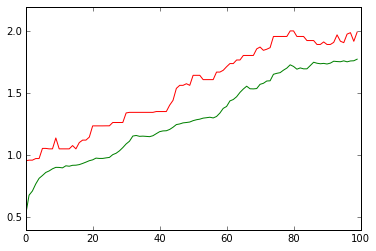

In [19]:
import random
from pandas import *
#create a population 
population=list()
#populate list called population with 100 random numbers 
popSize=100 
generations=100
mutationRate=0.1 #the mutation rate

meanW=list() #mean fitness
maxW=list() #max fitness
#counts from zero to pop size
for n in list(range(popSize)):
    #each organism is a random number 0.0 to 1.0
    #fitness assigned
    population.append(random.uniform(0.0,1.0))
#going through a defined number of generations    
for generation in list(range(generations)):
    #creating a generation to fill
    nextGeneration=list()
    #pick two organisms (by the indices) 
    meanW.append(mean(population))
    maxW.append(max(population))
    
    #selecting random organisms to compete against each other until generation is the same size as original population
    sumOfFitness=sum(population)
    while len(nextGeneration)<popSize:
        R=random.uniform(0.0,sumOfFitness)
        who=0 #looking at the lowest organism in the list 
        #as long as organism is larger than what we are looking at we have to....
        while(R>population[who]):
            #decrease R until R is smaller than the organims value
            R=R-population[who]
            who=who+1
        nextGeneration.append(applyMutation(population[who],mutationRate))
    population=list(nextGeneration)
    
plot(meanW,'g')
plot(maxW,'r')

# Rejection Method

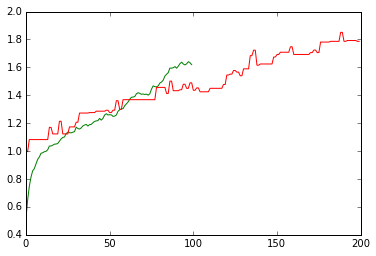

In [22]:
import random
from pandas import *
#create a population 
population=list()
#populate list called population with 100 random numbers 
popSize=100 
generations=100
mutationRate=0.1 #the mutation rate

meanW=list() #mean fitness
maxW=list() #max fitness
#counts from zero to pop size
for n in list(range(popSize)):
    #each organism is a random number 0.0 to 1.0
    #fitness assigned
    population.append(random.uniform(0.0,1.0))
#going through a defined number of generations    
for generation in list(range(generations)):
    #creating a generation to fill
    nextGeneration=list()
    #pick two organisms (by the indices) 
    meanW.append(mean(population))
    maxW.append(max(population))
    highestFitness=max(population)
    maxW.append(highestFitness)
    
    while len(nextGeneration)<popSize:
        who=random.randint(0,popSize-1)
        while(random.uniform(0.0,1.0)>(population[who]/highestFitness)):
            who=random.randint(0,popSize-1)
        nextGeneration.append(applyMutation(population[who],mutationRate))
    population=list(nextGeneration)
    
plot(meanW,'g')
plot(maxW,'r')